In [1]:
# Reference: Qiskit Textbook

In [2]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

In [3]:
# set the length of the n-bit input string. 
n = 4

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
     ┌───┐
q_4: ┤ X ├
     └───┘

In [4]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "1011"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     ├───┤
q_3: ┤ X ├
     └───┘
q_4: ─────

In [5]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "1011"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

┌───┐ ░                      ░ ┌───┐
q_0: ┤ X ├─░───■──────────────────░─┤ X ├
     └───┘ ░   │                  ░ └───┘
q_1: ──────░───┼────■─────────────░──────
     ┌───┐ ░   │    │             ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■────────░─┤ X ├
     ├───┤ ░   │    │    │        ░ ├───┤
q_3: ┤ X ├─░───┼────┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_4: ──────░─┤ X ├┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘└───┘ ░

# 1(a)

In [6]:
import qiskit
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

from qiskit.tools.visualization import plot_histogram

In [7]:
STRING = '1011'

In [8]:
oracle_a = QuantumCircuit(n+1, 1)
b_str = STRING

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        oracle_a.x(qubit)

balanced_oracle.barrier()

for i in range(len(b_str)):
    oracle_a.i(i)
    
oracle_a.barrier()

oracle_a.measure(n, 0)
oracle_a.draw()

┌───┐┌───┐ ░    
q_0: ┤ X ├┤ I ├─░────
     ├───┤└───┘ ░    
q_1: ┤ I ├──────░────
     ├───┤┌───┐ ░    
q_2: ┤ X ├┤ I ├─░────
     ├───┤├───┤ ░    
q_3: ┤ X ├┤ I ├─░────
     └───┘└───┘ ░ ┌─┐
q_4: ───────────░─┤M├
                ░ └╥┘
c: 1/══════════════╩═
                   0

{'0': 10}


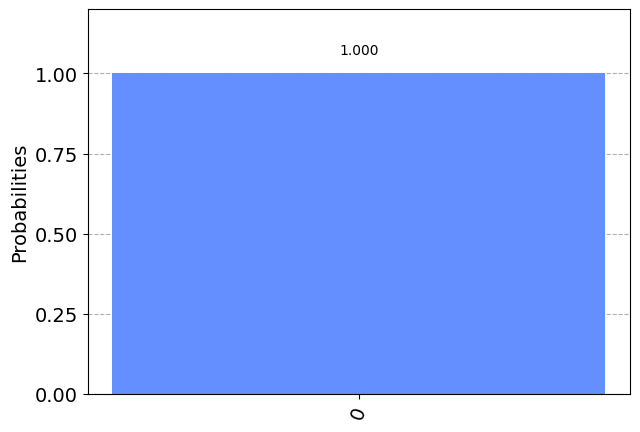

In [9]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(oracle_a, simulator, shots=10)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [10]:
oracle_b = QuantumCircuit(n+1, 1)
b_str = STRING

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        oracle_b.x(qubit)

balanced_oracle.barrier()

for i in range(len(b_str)):
    oracle_b.i(i)
    
oracle_b.x(n)
    
oracle_b.barrier()

oracle_b.measure(n, 0)
oracle_b.draw()

┌───┐┌───┐ ░    
q_0: ┤ X ├┤ I ├─░────
     ├───┤└───┘ ░    
q_1: ┤ I ├──────░────
     ├───┤┌───┐ ░    
q_2: ┤ X ├┤ I ├─░────
     ├───┤├───┤ ░    
q_3: ┤ X ├┤ I ├─░────
     ├───┤└───┘ ░ ┌─┐
q_4: ┤ X ├──────░─┤M├
     └───┘      ░ └╥┘
c: 1/══════════════╩═
                   0

{'1': 10}


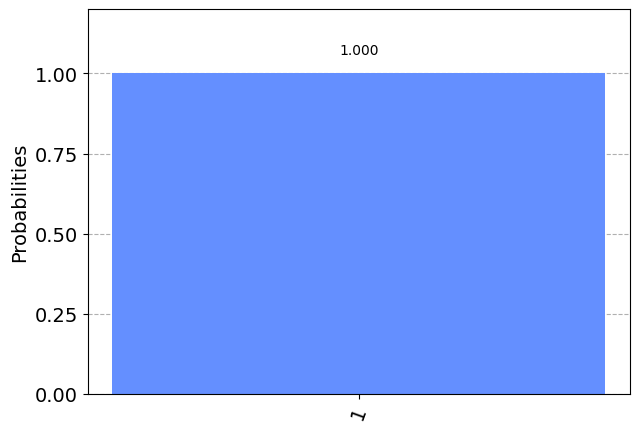

In [11]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(oracle_b, simulator, shots=10)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [12]:
oracle_c = QuantumCircuit(n+1, 1)
b_str = STRING

for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        oracle_c.x(qubit)
        
balanced_oracle.barrier()

for i in range(len(b_str)):
    oracle_c.cx(i, n)
    
oracle_c.barrier()

oracle_c.measure(n, 0)
oracle_c.draw()

┌───┐                     ░    
q_0: ┤ X ├──■──────────────────░────
     └───┘  │                  ░    
q_1: ───────┼────■─────────────░────
     ┌───┐  │    │             ░    
q_2: ┤ X ├──┼────┼────■────────░────
     ├───┤  │    │    │        ░    
q_3: ┤ X ├──┼────┼────┼────■───░────
     └───┘┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ ┌─┐
q_4: ─────┤ X ├┤ X ├┤ X ├┤ X ├─░─┤M├
          └───┘└───┘└───┘└───┘ ░ └╥┘
c: 1/═════════════════════════════╩═
                                  0

{'1': 10}


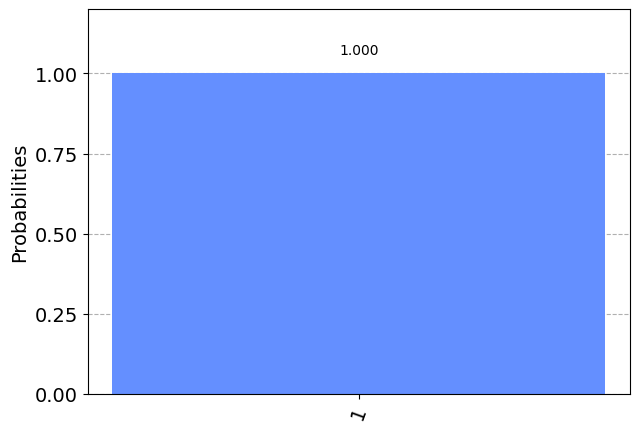

In [13]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(oracle_c, simulator, shots=10)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# 1(b)

In [14]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

C:\Users\User\AppData\Local\Temp\ipykernel_11108\460382824.py:12: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_circuit += balanced_oracle


┌───┐┌───┐ ░                      ░ ┌───┐ ░  ░  ░ ┌───┐ ░ ┌─┐         
q_0: ┤ H ├┤ X ├─░───■──────────────────░─┤ X ├─░──░──░─┤ H ├─░─┤M├─────────
     ├───┤└───┘ ░   │                  ░ └───┘ ░  ░  ░ ├───┤ ░ └╥┘┌─┐      
q_1: ┤ H ├──────░───┼────■─────────────░───────░──░──░─┤ H ├─░──╫─┤M├──────
     ├───┤┌───┐ ░   │    │             ░ ┌───┐ ░  ░  ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├┤ X ├─░───┼────┼────■────────░─┤ X ├─░──░──░─┤ H ├─░──╫──╫─┤M├───
     ├───┤├───┤ ░   │    │    │        ░ ├───┤ ░  ░  ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤ X ├─░───┼────┼────┼────■───░─┤ X ├─░──░──░─┤ H ├─░──╫──╫──╫─┤M├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░  ░  ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├─░───────░──░──░───────░──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘└───┘ ░       ░  ░  ░       ░  ║  ║  ║  ║ 
c: 4/═══════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                0  1  2  3

{'1111': 1024}


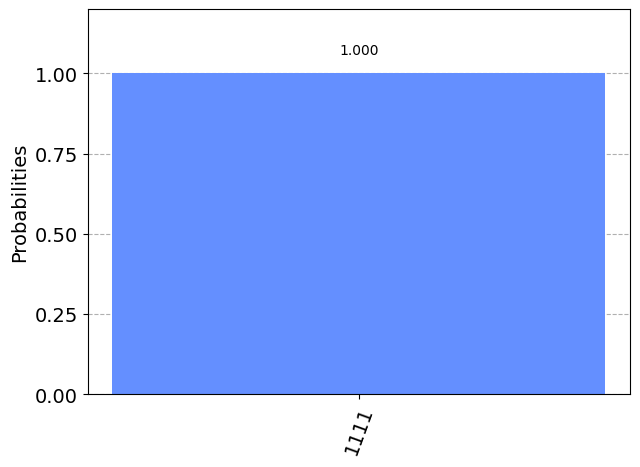

In [15]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(dj_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
print(answer)

plot_histogram(answer)

In [16]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
            
    if case == "1a_1":
        for qubit in range(n):
            oracle_qc.i(qubit)
    if case == "1a_2":
        for qubit in range(n):
            oracle_qc.i(qubit)
        oracle_qc.x(n)
    if case == "1a_3":
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [17]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

In [18]:
n = 4
oracle_gate = dj_oracle('1a_3', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├─────────
     ├───┤     │         │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

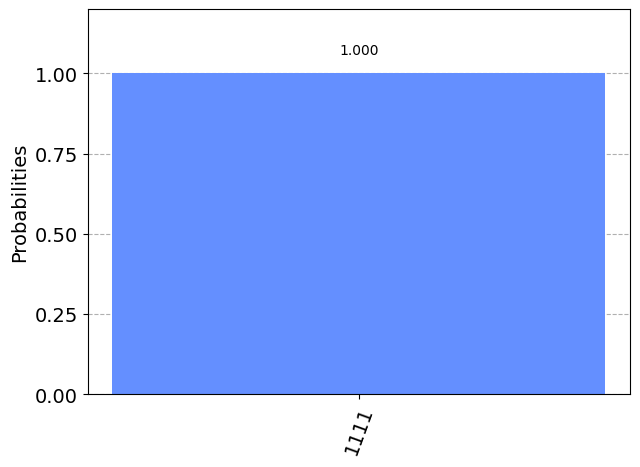

In [19]:
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)